# Regression Analysis of Temporal Processes (Class 12) - Bayesian Structural Time Series

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

The closest Python implementation of the `bsts` package in R seems to be `pydlm`

See the example on the github page as well as the module reference for more details.
https://github.com/wwrechard/pydlm

Bring in the dataframe from R:

In [39]:
claims = pd.read_csv('initial_claims.csv')

In [40]:
# preparing data to be in the right format for pydlm
variables = list(claims.columns)
data_map = {}

for column in claims:
    data_piece = claims[column].tolist()
    data_map[column] = data_piece

time_series = data_map[variables[0]]
features = [[data_map[variables[j]][i] for j in range(1, len(variables))] for i in range(len(time_series))]

In [7]:
# slide 19
from pydlm import dlm, trend, seasonality

linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)
seasonal52 = seasonality(period=52, discount=0.99, name='seasonal52', w=10)
model1 = dlm(time_series) + linear_trend + seasonal52

model1.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


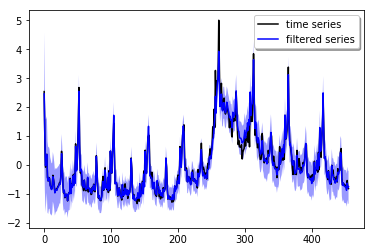

In [58]:
# slide 20
model1.turnOff('predict plot')
model1.turnOff('smoothed plot')
model1.plot()

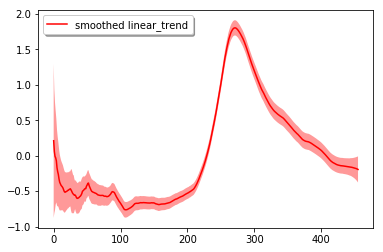

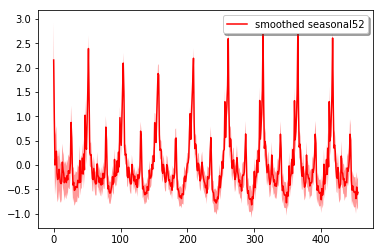

In [51]:
# slide 21
model1.turnOff('predict plot')
model1.turnOff('filtered plot')
model1.plot('linear_trend')
model1.plot('seasonal52')

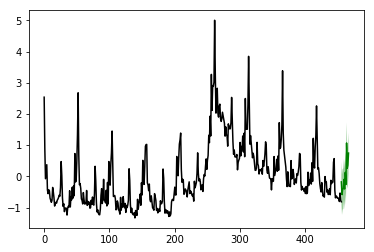

In [60]:
# plotting prediction for the next 12 weeks
model1.plotPredictN(N=12)

## A dynamic model with additional variable

In [8]:
from pydlm import dynamic
regressor10 = dynamic(features=features, discount=1.0, name='regressor10', w=10)
model2 = dlm(time_series) + linear_trend + seasonal52 + regressor10
model2.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


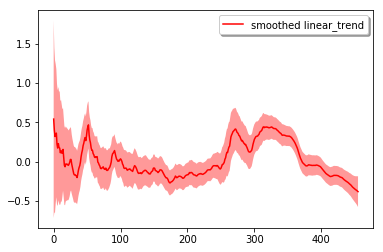

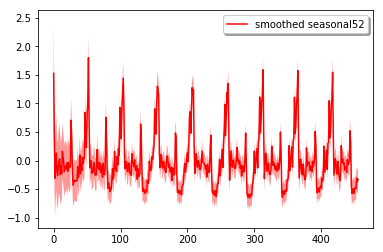

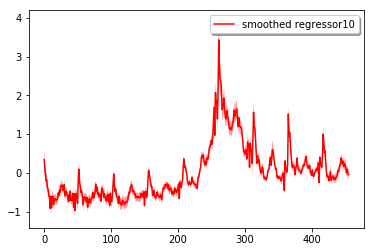

In [9]:
model2.turnOff('predict plot')
model2.turnOff('filtered plot')
model2.plot('linear_trend')
model2.plot('seasonal52')
model2.plot('regressor10')